<a href="https://colab.research.google.com/github/BlossomMa/Data-Analytics-and-other-Projects/blob/main/Progress_Report_IT7103.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Progress Report - IT 7103
- Blossom Madubike
- Damola Ojo


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/IT7103/Cleaned_DiabetesProjectData.csv')

In [ ]:
data

,_AGE80,SEXVAR,EDUCA,GENHLTH,INCOME3,SLEPTIM1,_BMI5CAT,EXERANY2,PERSDOC3,MEDCOST1,DIABETE4,_SMOKER3,CVDINFR4,CVDSTRK3
0,80,2,6,2,0,8,0,2,1,2,1,4,2,2
1,80,2,4,1,5,6,3,2,2,2,3,4,2,2
2,56,2,6,2,10,5,3,1,1,2,3,4,2,2
3,3,2,4,1,0,0,2,1,1,2,3,2,2,2
4,43,2,5,4,5,0,2,1,2,2,3,4,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445127,10,2,4,3,1,6,3,1,3,2,3,4,2,2
445128,51,2,6,1,0,0,3,1,2,2,3,4,2,2
445129,65,2,4,5,0,5,1,2,3,1,3,1,2,2
445130,3,1,5,2,8,5,4,2,2,2,3,4,1,2


In [ ]:
data.dtypes

,0
_AGE80,int64
SEXVAR,int64
EDUCA,int64
GENHLTH,int64
INCOME3,int64
SLEPTIM1,int64
_BMI5CAT,int64
EXERANY2,int64
PERSDOC3,int64
MEDCOST1,int64


# Data Vizualization

Text(0.5, 1.0, 'Distribution of Age')

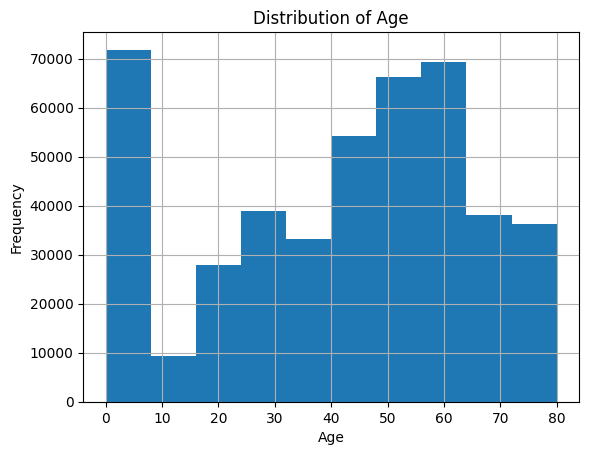

In [ ]:
data['_AGE80'].hist()
plt.xlabel('Age')  # Label for x-axis
plt.ylabel('Frequency')  # Label for y-axis
plt.title('Distribution of Age')  # Title of the plot

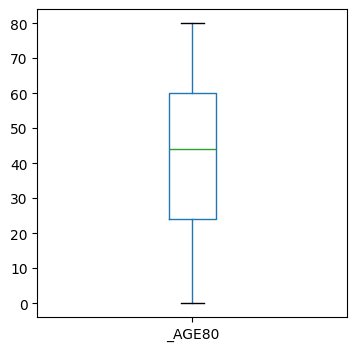

In [ ]:
data[['_AGE80']].boxplot(grid=False, figsize=(4,4))
plt.show()

Based on the results of the boxplot and histogram, the distribution of the 'Age" column is skewed. **It is negatively skewed.**

In [ ]:
data['_AGE80'].mean() #confirming the distribution shape

np.float64(41.232387246929)

In [ ]:
data['_AGE80'].median() #confirming the distribution shape

44.0

In [ ]:
data['_AGE80'].skew() #confirming the distribution shape

np.float64(-0.2859614254511256)

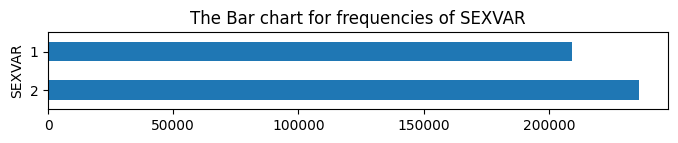

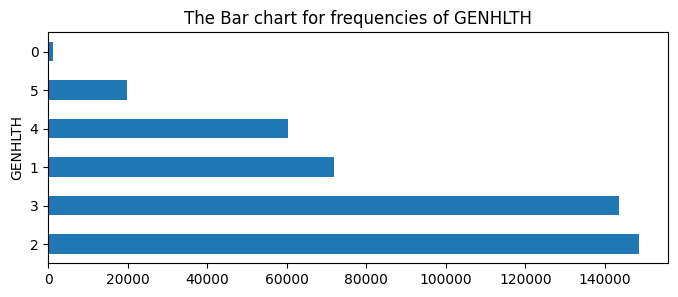

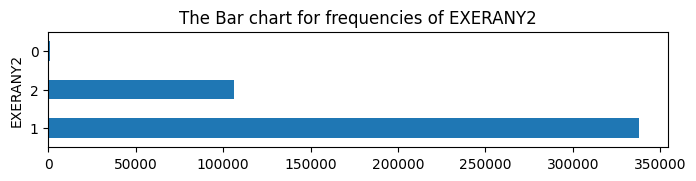

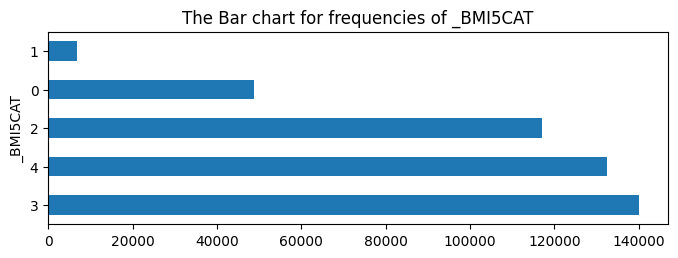

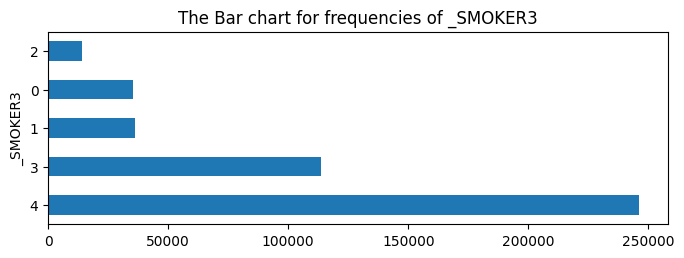

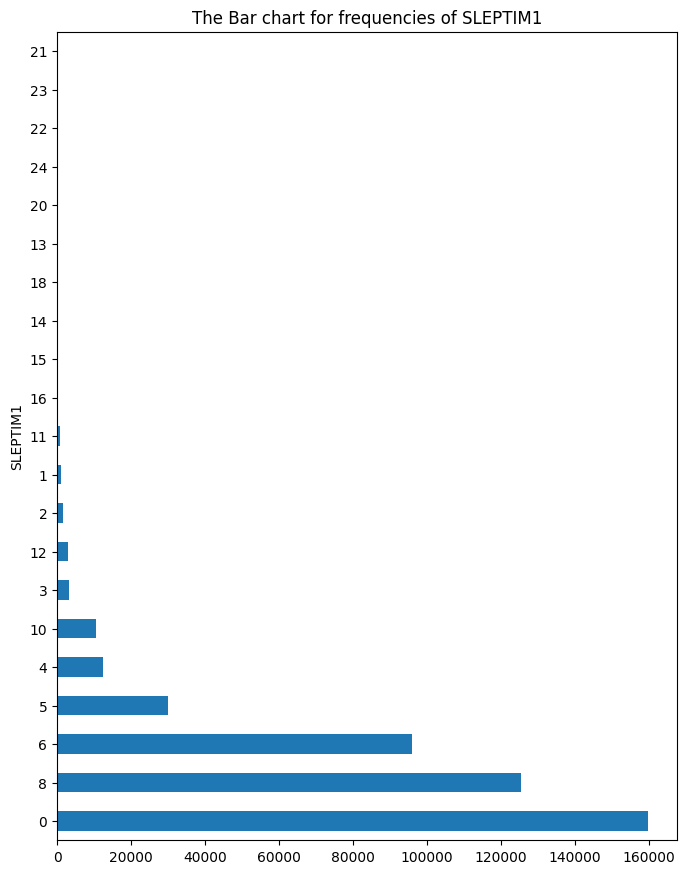

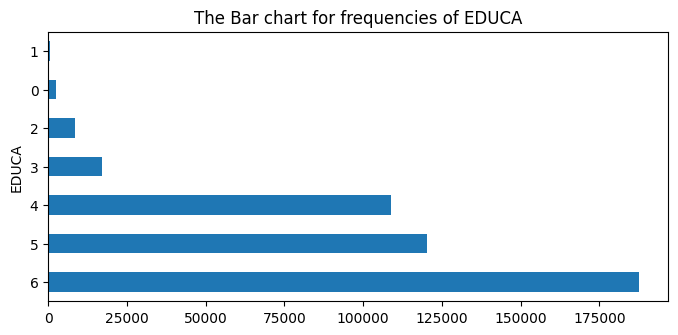

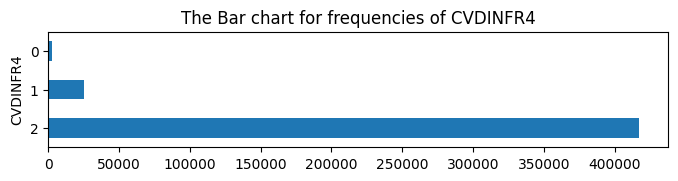

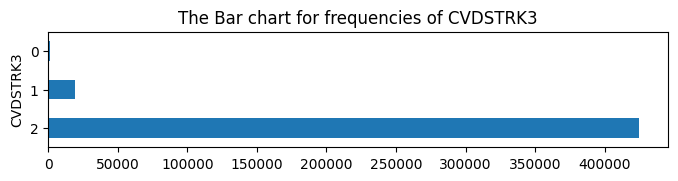

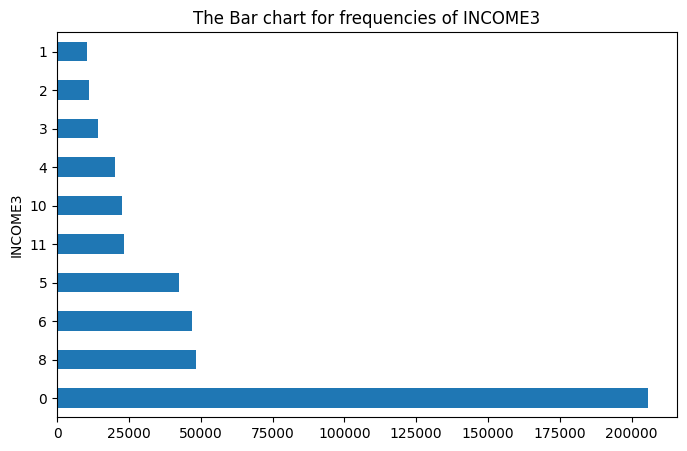

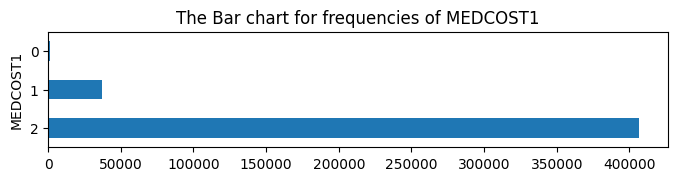

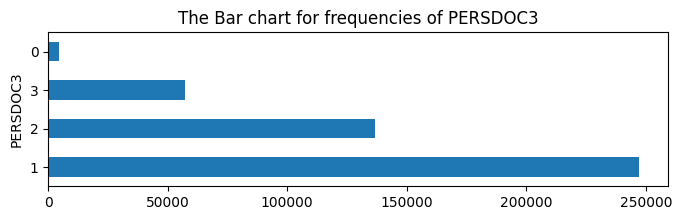

In [ ]:
cat_cols = ['SEXVAR','GENHLTH','EXERANY2','_BMI5CAT','_SMOKER3','SLEPTIM1','EDUCA','CVDINFR4','CVDSTRK3','INCOME3','MEDCOST1','PERSDOC3']
for col in cat_cols:
    frequency_table = data[col].value_counts()
    plt.figure(figsize = (8,len(frequency_table)*0.5))
    frequency_table.plot.barh(title='The Bar chart for frequencies of ' + col)
    plt.show()

In [ ]:
# Define the target variable
y = data['DIABETE4']

# Define the feature variables (drop the target column)
X = data.drop('DIABETE4', axis=1)


In [ ]:
print("X shape:", X.shape)
print("y shape:", y.shape)

In [ ]:
%whos

In [ ]:
print("Unique values in y:", y.unique())

Unique values in y: [1 3 4 0 2]


In [ ]:
# Combine X and y into one DataFrame for filtering
df = pd.concat([X, y.rename("DIABETE4")], axis=1)

# Keep only rows where DIABETE4 is in [1, 2, 3, 4]
df = df[df["DIABETE4"].isin([1, 2, 3, 4])]

# Recode the target: 1 = diabetic, 0 = not diabetic
df["DIABETE4"] = df["DIABETE4"].apply(lambda x: 1 if x == 1 else 0)

# Split back into X and y
X = df.drop("DIABETE4", axis=1)
y = df["DIABETE4"]

# Optional: check that target is now binary
print("New target classes:", y.unique())


New target classes: [1 0]


##Modeling

In [ ]:
#1. Logistic regression

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression())
])

# Model and hyperparameter tuning
param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10],
    'classifier__penalty': ['l2'],
    'classifier__solver': ['lbfgs', 'liblinear']
}

grid = GridSearchCV(pipeline, param_grid, cv=3, scoring='f1', n_jobs=-1)
grid.fit(X_train, y_train)

# Evaluation
y_pred = grid.predict(X_test)
print("Best Params:", grid.best_params_)
print(classification_report(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, grid.predict_proba(X_test)[:, 1]))


Best Params: {'classifier__C': 1, 'classifier__penalty': 'l2', 'classifier__solver': 'lbfgs'}
              precision    recall  f1-score   support

           0       0.87      0.99      0.93     76586
           1       0.48      0.06      0.10     12223

    accuracy                           0.86     88809
   macro avg       0.68      0.52      0.51     88809
weighted avg       0.82      0.86      0.81     88809

AUC-ROC: 0.7445713160639751


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

dt = DecisionTreeClassifier(random_state=42)

grid = GridSearchCV(dt, param_grid, cv=3, scoring='f1')
grid.fit(X_train, y_train)

# Evaluation
y_pred = grid.predict(X_test)
print("Best Params:", grid.best_params_)
print(classification_report(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, grid.predict_proba(X_test)[:, 1]))


In [ ]:
#2. Random Forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
}
rf = RandomForestClassifier(random_state=42)
grid = GridSearchCV(rf, param_grid, cv=3, scoring='f1', n_jobs=-1)
grid.fit(X_train, y_train)

y_pred = grid.predict(X_test)
print("Best Params:", grid.best_params_)
print(classification_report(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, grid.predict_proba(X_test)[:, 1]))


In [ ]:
#4. Self-Research Model: XGBoost